<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/socialNetworkAnalysis/blob/main/SentimentAnalysisOnAmazonAlexaReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P V S N S GANESH KUMAR**

**22MCB0036**

**Amazon Alexa Reviews Analysis: [Dataset](https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews)**

In [24]:
# Importing the required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
# https://data.world/rapiddev/us-election-tweets-sentiment/workspace/file?

In [25]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample.csv')#,encoding='latin1')
# dtaa = data.head(20000)

In [26]:
# Data Dimensions
data.dropna(inplace=True)
data.shape

(4084, 2)

In [27]:
# Seeing the top rows of data
data.head()

,tweet,label
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   4084 non-null   object
 1   label   4084 non-null   object
dtypes: object(2)
memory usage: 63.9+ KB


In [29]:
data.describe()

,tweet,label
count,4084,4084
unique,3465,3
top,good,positive
freq,151,3066


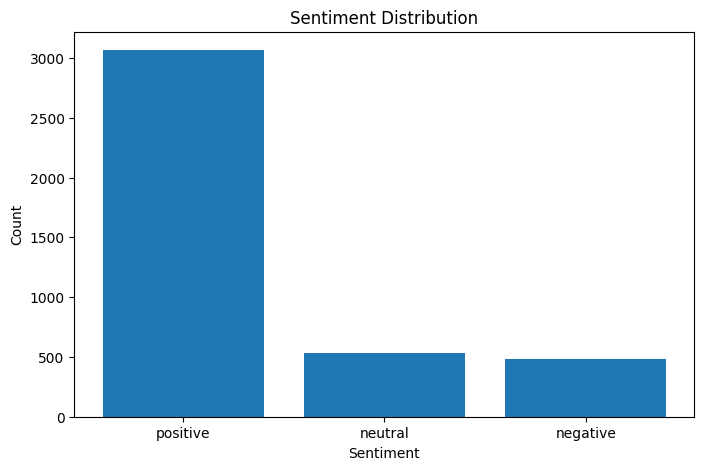

In [30]:
# Bar Plot visualization of No of observations for each label
sentiment_counts = data['label'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [31]:
labels = data['label'].value_counts()
numbers = labels.index
quantity = labels.values

import plotly.express as px 
figure = px.pie(data, values = quantity,  names =  numbers, hole = 0.5)
figure.update_layout(width=500, height=500)
figure.show()

In [32]:
# Importing required packages for preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
data['tweet'] = data['tweet'].astype(str)
# Select the text part of the list
text = [i for i in data.tweet]
data.head()

,tweet,label
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [34]:
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]
for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [35]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [36]:
data['tweet'] = trim_list
data.head()

,tweet,label
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


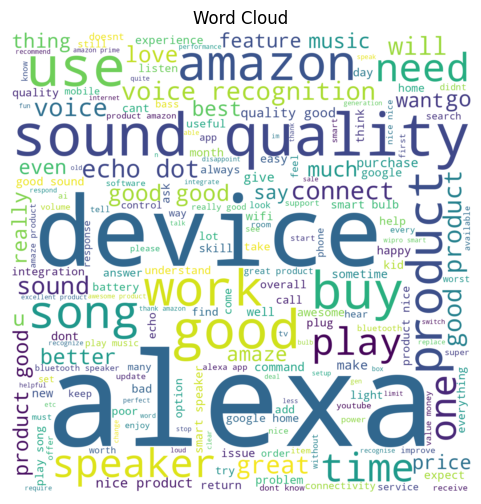

In [37]:
# Word Cloud visualization
from wordcloud import WordCloud

all_words = ' '.join(data['tweet'])
wordcloud = WordCloud(width=1500, height=1500, background_color='white').generate(all_words)

plt.figure(figsize=(6, 6)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# **Splitting the data for train and test**

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

data['label'] = np.where(data['label']=='positive', 1, np.where(data['label']=='negative', -1, 0))
data.head()



,tweet,label
0,able play youtube alexa,1
1,able recognize indian accent really well drop ...,1
2,absolute smart device amazon connect external ...,1
3,absolutely amaze new member family control hom...,1
4,absolutely amaze previously sceptical invest m...,1


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.3,random_state=1)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# **VADER( Valence Aware Dictionary for Sentiment Reasoning) SentimentIntensityAnalyzer**

The Vader SentimentIntensityAnalyzer from NLTK is a pre-trained sentiment analysis tool that uses a pre-trained lexicon and heuristics to determine the sentiment of a text. It uses a list of words and their corresponding sentiment scores, which are manually annotated by human evaluators. The resulting compound score represents the overall sentiment polarity. The Vader lexicon is pre-trained on large datasets, providing reasonable sentiment analysis results without explicit training. However, performance may vary depending on the domain or context of the text data.

In [40]:
# Perform sentiment analysis using Vader from NLTK
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment_scores = data['tweet'].apply(lambda text: sia.polarity_scores(text))

# Extract the compound sentiment score
data['sentiment_SIA'] = sentiment_scores.apply(lambda scores: 1 if scores['compound'] > 0 else -1 if scores['compound'] < 0 else 0)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
data.head()

,tweet,label,sentiment_SIA
0,able play youtube alexa,1,1
1,able recognize indian accent really well drop ...,1,1
2,absolute smart device amazon connect external ...,1,1
3,absolutely amaze new member family control hom...,1,1
4,absolutely amaze previously sceptical invest m...,1,1


In [42]:
# Performance metrics

y_true = data['label']
y_pred = data['sentiment_SIA']

# Calculate accuracy
accuracy_SIA = accuracy_score(y_true, y_pred)

# Calculate precision
precision_SIA = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
recall_SIA = recall_score(y_true, y_pred, average='weighted')

# Calculate F1-score
f1_SIA = f1_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_SIA)
print("Precision:", precision_SIA)
print("Recall:", recall_SIA)
print("F1-score:", f1_SIA)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8136630754162586
Precision: 0.825684390525003
Recall: 0.8136630754162586
F1-score: 0.8165441186022988
Confusion Matrix:
 [[ 321   58  103]
 [ 110  266  160]
 [ 240   90 2736]]


# **Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Make predictions on the test set
y_pred = log.predict(X_test_vectorized)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
# Evaluate performance
# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred)

# Calculate precision
precision_log = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_log = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_log = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1-score:", f1_log)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8278955954323002
Precision: 0.8203191543679331
Recall: 0.8278955954323002
F1-score: 0.8019964789498467
Confusion Matrix:
 [[ 61  12  78]
 [  2  52 100]
 [  8  11 902]]


# **Naive Bayes**

Naïve Bayes is a supervised learning algorithm based on Bayes theorem, primarily used in text classification with high-dimensional training datasets. It is a probabilistic classifier, enabling quick predictions and applications in spam filtration, sentiment analysis, and article classification.

In [47]:
# Importing required packages
from sklearn.naive_bayes import MultinomialNB

In [48]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [49]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
# Evaluate performance
# Calculate accuracy
accuracy_Naive = accuracy_score(y_test, y_pred)

# Calculate precision
precision_Naive = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_Naive = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_Naive = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_Naive)
print("Precision:", precision_Naive)
print("Recall:", recall_Naive)
print("F1-score:", f1_Naive)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7528548123980424
Precision: 0.7515398765962786
Recall: 0.7528548123980424
F1-score: 0.6498379712674558
Confusion Matrix:
 [[  2   0 149]
 [  0   1 153]
 [  0   1 920]]


# **Random Forest Classifier**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Create the random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train_vectorized, y_train)

RandomForestClassifier(max_depth=10)

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
# Evaluate performance
# Calculate accuracy
accuracy_random = accuracy_score(y_test, y_pred)

# Calculate precision
precision_random = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_random = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_random = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_random)
print("Precision:", precision_random)
print("Recall:", recall_random)
print("F1-score:", f1_random)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7512234910277324
Precision: 0.5643367334718936
Recall: 0.7512234910277324
F1-score: 0.6445056685948222
Confusion Matrix:
 [[  0   0 151]
 [  0   0 154]
 [  0   0 921]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Create the decision tree classifier with desired hyperparameters
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Train the model
model.fit(X_train_vectorized, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)
y_pred

array([ 1,  1,  1, ..., -1,  1,  1])

In [58]:
# Evaluate performance
# Calculate accuracy
accuracy_decision= accuracy_score(y_test, y_pred)

# Calculate precision
precision_decision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_decision = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_decision = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_decision)
print("Precision:", precision_decision)
print("Recall:", recall_decision)
print("F1-score:", f1_decision)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.767536704730832
Precision: 0.721811158079822
Recall: 0.767536704730832
F1-score: 0.7247082540558675
Confusion Matrix:
 [[ 41  17  93]
 [  2  22 130]
 [ 25  18 878]]


# **Performance Metrics**

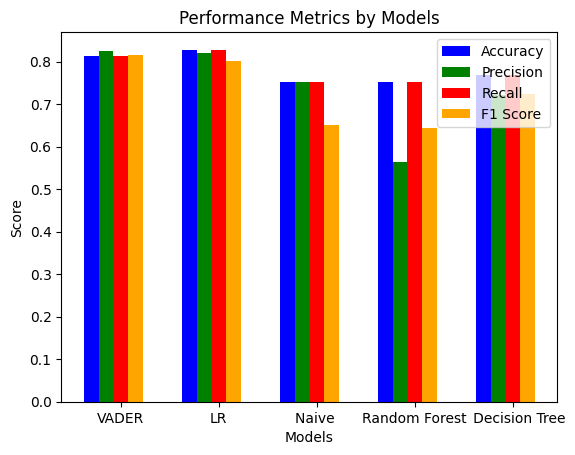

<Figure size 2500x2500 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['VADER', 'LR', 'Naive ', 'Random Forest', '   Decision Tree']
accuracy = [accuracy_SIA, accuracy_log, accuracy_Naive, accuracy_random, accuracy_decision]
precision = [precision_SIA,precision_log,precision_Naive,precision_random,precision_decision]
recall = [recall_SIA,recall_log,recall_Naive,recall_random,recall_decision]
f1 = [f1_SIA,f1_log,f1_Naive,f1_random,f1_decision]

# Set the width of the bars
bar_width = 0.15

# Set the spacing between each model's bars
model_spacing = 5

# Set the positions of the bars on the x-axis
r = np.arange(len(models))

# Plot each performance metric for each model
plt.bar(r, accuracy, color='b', width=bar_width, label='Accuracy')
plt.bar(r + bar_width, precision, color='g', width=bar_width, label='Precision')
plt.bar(r + 2 * bar_width, recall, color='r', width=bar_width, label='Recall')
plt.bar(r + 3 * bar_width, f1, color='orange', width=bar_width, label='F1 Score')

# Set the x-axis labels and title
plt.xticks(r + 2 * bar_width, models)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics by Models')

# Add a legend
plt.legend()

# Adjust the spacing between models
plt.subplots_adjust(wspace=model_spacing)
plt.figure(figsize=(25, 25))
# Display the plot
plt.show()